# Models

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn import grid_search, metrics

from util.dfmgmt import initSet, wrangle
from util.polarize import *

In [2]:
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

target = 'charted'  # main feature to be predicted

In [3]:
df = initSet()

In [4]:
# Check head
df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1


### Build model after determining the best classifier

In [5]:
df['sentiment_polarity'] = df.apply(sentiment, axis=1)
# df['above_third_grade'] = df.apply(reading_score, axis=1)

In [6]:
# df_new, features = dummyfy(df, 'sentiment_polarity', 'verbs')
df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted,sentiment_polarity
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0,1
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1,1


In [7]:
# Drop both year and decade
dropList = ['most_used_term']
removeList = ['decade', 'year', 'charted']

df_new, features = wrangle(df, dropList, removeList)

In [8]:
features = ['sentiment_polarity', 'explicit', 'verbs']

In [9]:
from sklearn import linear_model

# set X and y and build model
X = df_new[features]
y = df_new[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

# train model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# df_new['probability'] = model.predict_proba(X).T[1] # 3904 <- use this to explain all data
# df_new['probability'].describe()

In [11]:
# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % model.score(X_train, y_train)
print "Accuracy: %0.3f" % model.score(X_test, y_test)

# Evaluate ROC AUC score of model on test set
# print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

Accuracy: 0.702
Accuracy: 0.700


In [13]:
df_test = X_test
df_test['probability'] = model.predict_proba(X_test).T[1]
df_test[target] = y_test
df_test = df_test[np.abs(df_test.verbs-df_test.verbs.mean())<=(3*df_test.verbs.std())]


/home/sabbir/anaconda2/envs/venv/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sabbir/anaconda2/envs/venv/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
print df_test['verbs'].describe()

count    769.000000
mean      60.057217
std       39.043970
min        0.000000
25%       31.000000
50%       54.000000
75%       79.000000
max      193.000000
Name: verbs, dtype: float64


In [15]:
# sentimentLabels = ['negative', 'neutral', 'positive']
# plotFeature(df_new, features, 'probability', 'verbs', 'sentiment score', sentimentLabels)

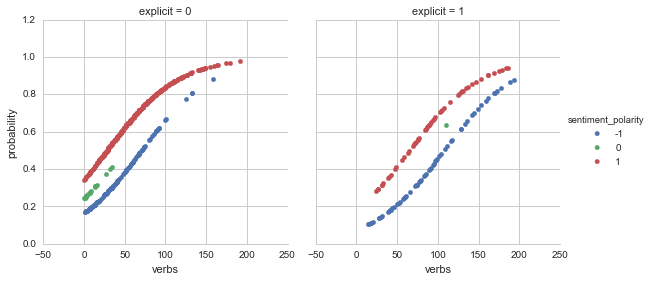

In [16]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(df_test, hue='sentiment_polarity', col='explicit', size=4)
g.map(qqplot, 'verbs', 'probability')
g.add_legend();

In [ ]:
df = initSet()
df['reading_score_level'] = df.apply(reading_score, axis=1)

In [ ]:
# Keep year
dropList = ['most_used_term']
removeList = ['decade', 'charted']

df_new, features = wrangle(df, dropList, removeList)

In [ ]:
# df_new, features = dummyfy(df, 'reading_score_level', 'year')

In [ ]:
from sklearn import ensemble

# set X and y and build model
X = df_new[features]
y = df_new[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
)

# train model
model = ensemble.RandomForestClassifier(n_estimators=64)
model.fit(X_train, y_train)
# predict
df_new['probability'] = model.predict_proba(X).T[1]

In [ ]:
readingScoreLabels = ['below 3rd grade', 'above 3rd grade']
plotFeature(df_new, features, 'year', 'reading score', readingScoreLabels)

In [ ]:
df_new.head()

In [ ]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(df_new, hue='reading_score_level', size=4)
g.map(qqplot, "year", "probability")
g.add_legend();